In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

In [2]:
def Function(x):
    
    return 3*(x**5) + 5*(x**4) - x**3
    #return x**2 + 3*x

In [3]:
soporte_x =  np.linspace(-2., 1., 301)

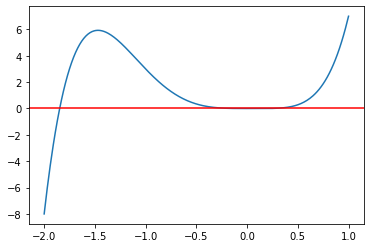

<Figure size 720x720 with 0 Axes>

In [4]:
plt.plot(soporte_x, Function(soporte_x))
plt.axhline(0, color="r")
plt.figure(figsize=(10,10))
plt.show()

In [5]:
def Derivative(f,x,h=1e-4):
    return (f(x+h)-f(x-h))/(2*h)

In [6]:
def GetNewtonRaphson(f,df,xn,itmax = 100, precision=1e-10):
    
    error = 1
    it = 0
    
    while error > precision and it <= itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(f,xn)
            
            error = np.abs(f(xn)/df(f,xn))
            
        except ZeroDivisionError:
            
            print('Division por cero')
            
        it += 1
        xn = xn1
    
    if it == itmax:
        return "Not Found"
    else:
        return xn

In [7]:
def GetAllRootsInInterval(soporte_intervalo, f, df, Newton_Raphson, tolerancia=6):
    
    Roots = np.array([])
    
    x0 = soporte_intervalo[0]
    
    zero_f = Newton_Raphson(f, df, x0)
        
    if zero_f == "Not Found":
        return Roots
        
    rzero_f = np.round(zero_f, tolerancia)
    
    Roots = np.append(Roots, rzero_f)
    
    
    
    for n in range(1, len(soporte_intervalo)-1):
        
        xn_1 = soporte_intervalo[n+1]
        xn = soporte_intervalo[n]
        
        
        dn_1 = df(f, xn_1)
        dn = df(f, xn)

            
        if (f(xn) * f(xn_1)  <= 0.) or (dn * dn_1 <= 0.):
            zero_f = Newton_Raphson(f, df, xn_1)
            rzero_f = np.round(zero_f, tolerancia)
            
            same = False
            
            for root in Roots:
                d = np.abs(root - rzero_f)
                if d < 1e-5:
                    same = True
            
            if not same and rzero_f not in Roots:
                Roots = np.append(Roots, rzero_f)
        
    
    Roots.sort()
    
    return Roots

In [8]:
roots = GetAllRootsInInterval(soporte_x, Function, Derivative, GetNewtonRaphson)
roots

array([-1.847127,  0.      ,  0.18046 ])